In [28]:
import pandas as pd
import numpy as mnp
import matplotlib.pyplot as plt

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, f1_score
from rfpimp import permutation_importances

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import logistic_regression_functions as lrf
import GradientDescent as GD
GradientDescent = GD.GradientDescent

In [107]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

In [173]:
%run defvotes

In [174]:
d_votes.YR.unique()

array([17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5])

In [175]:
d_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 3 columns):
Player     583 non-null object
YR         583 non-null int32
advotes    583 non-null float64
dtypes: float64(1), int32(1), object(1)
memory usage: 11.5+ KB


In [168]:
from process_players import *

In [169]:
pdata = get_clean_pdata()

In [ ]:
pdata.head()

In [176]:
pdata = add_defvotes(pdata, d_votes)

In [177]:
pd = add_2yrs_prior(pdata)

In [178]:
pd.head()


,Player,Pos_x,Age_x,G_x,MP_x,PER_x,TS%_x,3PAr_x,FTr_x,ORB%_x,...,OBPM,DBPM,BPM,VORP,TM,YR,YRprior,2YRprior,MPG,advotes
0,Shareef Abdur-Rahim,PF,29.0,72.0,1961.0,17.2,0.588,0.035,0.440,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mike Bibby,PG,27.0,82.0,3167.0,17.9,0.554,0.360,0.292,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Francisco Garcia,SF,24.0,67.0,1301.0,10.3,0.510,0.422,0.311,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jason Hart,PG,27.0,66.0,818.0,7.1,0.444,0.140,0.253,1.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kevin Martin,SG,22.0,72.0,1913.0,14.8,0.604,0.328,0.407,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
pdmean = get_2yr_mean(pd)

/Users/David/galvanize/nba-final4-projections/process_players.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ap_2yr_mean[str(col_means[i])+"mean"] = (df[col_means[i]] + df[cols[i]])/2


In [14]:
pdmean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12879 entries, 0 to 12878
Data columns (total 28 columns):
Player         12879 non-null object
Pos_x          8016 non-null object
Age_x          8016 non-null float64
TM_x           8016 non-null object
YR_x           8055 non-null float64
MPmean         4979 non-null float64
PERmean        4979 non-null float64
TS%mean        4979 non-null float64
3PArmean       4979 non-null float64
FTrmean        4979 non-null float64
ORB%mean       4979 non-null float64
DRB%mean       4979 non-null float64
TRB%mean       4979 non-null float64
AST%mean       4979 non-null float64
STL%mean       4979 non-null float64
BLK%mean       4979 non-null float64
TOV%mean       4979 non-null float64
USG%mean       4979 non-null float64
OWSmean        4979 non-null float64
DWSmean        4979 non-null float64
WSmean         4979 non-null float64
WS/48mean      4979 non-null float64
OBPMmean       4979 non-null float64
DBPMmean       4979 non-null float64
BPMme

In [17]:
pdmean.columns

Index(['Player', 'Pos_x', 'Age_x', 'TM_x', 'YR_x', 'MPmean', 'PERmean',
       'TS%mean', '3PArmean', 'FTrmean', 'ORB%mean', 'DRB%mean', 'TRB%mean',
       'AST%mean', 'STL%mean', 'BLK%mean', 'TOV%mean', 'USG%mean', 'OWSmean',
       'DWSmean', 'WSmean', 'WS/48mean', 'OBPMmean', 'DBPMmean', 'BPMmean',
       'VORPmean', 'MPGmean', 'advotesmean'],
      dtype='object')

In [180]:
pdmean_10 = pdmean.sort_values('MPmean', ascending=False).groupby('TM_x').head(10)

In [181]:
pdmean_10.shape

(3910, 28)

In [182]:
pdnn = pdmean_10.dropna()

In [183]:
pdnn.shape

(3280, 28)

In [146]:
pdnn.groupby('TM_x').count()

,Player,Pos_x,Age_x,YR_x,MPmean,PERmean,TS%mean,3PArmean,FTrmean,ORB%mean,...,OWSmean,DWSmean,WSmean,WS/48mean,OBPMmean,DBPMmean,BPMmean,VORPmean,MPGmean,advotesmean
TM_x,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks 07-08,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Atlanta Hawks 08-09,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Atlanta Hawks 09-10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Atlanta Hawks 10-11,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Atlanta Hawks 11-12,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Atlanta Hawks 12-13,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Atlanta Hawks 13-14,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Atlanta Hawks 14-15,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Atlanta Hawks 15-16,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [184]:
team_m = pdnn.groupby('TM_x').mean()

In [185]:
team_m.shape

(330, 25)

In [36]:
target = pd.read_csv('data/TEAMstats - target.csv')

In [37]:
target.head()

,Team,YR,ConfFinals
0,Golden State Warriors*,17-18,1
1,Houston Rockets*,17-18,1
2,New Orleans Pelicans*,17-18,0
3,Toronto Raptors*,17-18,0
4,Cleveland Cavaliers*,17-18,1


In [39]:
target['Team'] = target['Team'].str.replace('*', '')

In [189]:
target.head()

,ConfFinals,TM_x
0,1,Golden State Warriors 17-18
1,1,Houston Rockets 17-18
2,0,New Orleans Pelicans 17-18
3,0,Toronto Raptors 17-18
4,1,Cleveland Cavaliers 17-18


In [186]:
team_m = team_m.reset_index()

In [206]:
team_m.columns

Index(['TM_x', 'Age_x', 'YR_x', 'MPmean', 'PERmean', 'TS%mean', '3PArmean',
       'FTrmean', 'ORB%mean', 'DRB%mean', 'TRB%mean', 'AST%mean', 'STL%mean',
       'BLK%mean', 'TOV%mean', 'USG%mean', 'OWSmean', 'DWSmean', 'WSmean',
       'WS/48mean', 'OBPMmean', 'DBPMmean', 'BPMmean', 'VORPmean', 'MPGmean',
       'advotesmean'],
      dtype='object')

In [43]:
target['TM_x'] = target['Team'] + ' ' + target['YR']

In [205]:
target.columns

Index(['ConfFinals', 'TM_x'], dtype='object')

In [46]:
target = target.drop(['Team','YR'], axis=1)

In [209]:
t_targ = team_m.merge(target, how="outer", on="TM_x")

In [211]:
t_targ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 359
Data columns (total 27 columns):
TM_x           360 non-null object
Age_x          330 non-null float64
YR_x           330 non-null float64
MPmean         330 non-null float64
PERmean        330 non-null float64
TS%mean        330 non-null float64
3PArmean       330 non-null float64
FTrmean        330 non-null float64
ORB%mean       330 non-null float64
DRB%mean       330 non-null float64
TRB%mean       330 non-null float64
AST%mean       330 non-null float64
STL%mean       330 non-null float64
BLK%mean       330 non-null float64
TOV%mean       330 non-null float64
USG%mean       330 non-null float64
OWSmean        330 non-null float64
DWSmean        330 non-null float64
WSmean         330 non-null float64
WS/48mean      330 non-null float64
OBPMmean       330 non-null float64
DBPMmean       330 non-null float64
BPMmean        330 non-null float64
VORPmean       330 non-null float64
MPGmean        330 non-null floa

In [213]:
t_targ = t_targ.dropna()

In [214]:
newtarg = t_targ['ConfFinals']

In [215]:
t_m2 = t_targ.drop('ConfFinals', axis=1)

In [216]:
t_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 26 columns):
TM_x           330 non-null object
Age_x          330 non-null float64
YR_x           330 non-null float64
MPmean         330 non-null float64
PERmean        330 non-null float64
TS%mean        330 non-null float64
3PArmean       330 non-null float64
FTrmean        330 non-null float64
ORB%mean       330 non-null float64
DRB%mean       330 non-null float64
TRB%mean       330 non-null float64
AST%mean       330 non-null float64
STL%mean       330 non-null float64
BLK%mean       330 non-null float64
TOV%mean       330 non-null float64
USG%mean       330 non-null float64
OWSmean        330 non-null float64
DWSmean        330 non-null float64
WSmean         330 non-null float64
WS/48mean      330 non-null float64
OBPMmean       330 non-null float64
DBPMmean       330 non-null float64
BPMmean        330 non-null float64
VORPmean       330 non-null float64
MPGmean        330 non-null floa

In [217]:
off_x = t_m2[['PERmean', 'TS%mean', '3PArmean', 'FTrmean', 'ORB%mean', 'TOV%mean', 'USG%mean', 'OWSmean', 'OBPMmean', 'MPGmean']]

In [218]:
def_x = t_m2[['STL%mean','BLK%mean', 'DWSmean', 'DBPMmean', 'MPGmean','advotesmean']]

In [219]:
all_x = t_m2[['PERmean', 'TS%mean', '3PArmean', 'FTrmean', 'ORB%mean', 'TOV%mean', 'USG%mean', 'OWSmean', 'OBPMmean', 'STL%mean','BLK%mean', 'DWSmean', 'DBPMmean', 'MPGmean','advotesmean']]

In [220]:
b2 = t_m2[['OWSmean','DWSmean','PERmean','advotesmean']]

In [221]:
wsm = t_m2[['WSmean','advotesmean']]

In [119]:
wsm48 = t_m['WS/48mean']

In [222]:
X_train_ws, X_test_ws, y_train_ws, y_test_ws = train_test_split(wsm, newtarg, random_state=40)

In [235]:
X_train_b2, X_test_b2, y_train_b2, y_test_b2 = train_test_split(b2, newtarg, random_state=41)

In [236]:
# Train and fit model                                                   
rfb2 = RandomForestClassifier(n_estimators=1000,
                           max_features='auto',
                           random_state=41, n_jobs=-1)
rfb2.fit(X_train_b2, y_train_b2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=41, verbose=0, warm_start=False)

In [237]:
# Test Prediction
pred_p = rfb2.predict(X_test_b2)
print('F1 score: {:.3}'.format(f1_score(y_test_b2, pred_p)))

F1 score: 0.25


In [238]:
tn, fp, fn, tp = confusion_matrix(y_test_b2, pred_p).ravel()

In [239]:
print(tp, fp)
print(fn, tn)

2 0
12 69


In [129]:
# Test Prediction
#pred_p = rf.predict(X_test_2)
print('Accuracy score: {:.3}'.format(rfws.score(X_test_bas, y_test_bas)))

Accuracy score: 0.831


In [104]:
# Test Prediction
pred_p = rfb2.predict(X_test_b2)
print('F1 score: {:.3}'.format(f1_score(pred_p, y_test_b2)))

F1 score: 0.182


In [105]:
# Test Prediction
#pred_p = rf.predict(X_test_2)
print('Accuracy score: {:.3}'.format(rfb2.score(X_test_b2, y_test_b2)))

Accuracy score: 0.783


In [240]:
#Testing out Logistic Regression
X = X_train_b2
X_const = add_constant(X, prepend=True)
y = y_train_b2

In [229]:
X_const

,const,WSmean,advotesmean
120,1.0,3.560000,0.100000
29,1.0,4.125000,3.000000
213,1.0,4.715000,0.850000
212,1.0,4.475000,0.350000
46,1.0,3.695000,5.625000
168,1.0,4.745000,0.187500
170,1.0,3.880000,1.900000
69,1.0,4.350000,0.112500
289,1.0,5.040000,1.900000
85,1.0,3.990000,1.800000


In [241]:
model = Logit(y, X_const).fit()

Optimization terminated successfully.
         Current function value: 0.291868
         Iterations 7


In [242]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             ConfFinals   No. Observations:                  247
Model:                          Logit   Df Residuals:                      242
Method:                           MLE   Df Model:                            4
Date:                Tue, 02 Apr 2019   Pseudo R-squ.:                  0.2108
Time:                        15:17:47   Log-Likelihood:                -72.091
converged:                       True   LL-Null:                       -91.345
                                        LLR p-value:                 8.803e-08
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.1655      3.788     -1.100      0.271     -11.589       3.258
OWSmean         1.0853      0.475      2.287      0.022       0.155       2.015
DWSmean         0.9968      0.602      1.657      0.097      -0.182       2.176
PERmean        -0.1870      0.296     -0.631      0.528      -0.768       0.394
advotesmean     0.1537      0.127      1.212      0.225      -0.095       0.402
===============================================================================
"""

TypeError: 'str' object is not callable

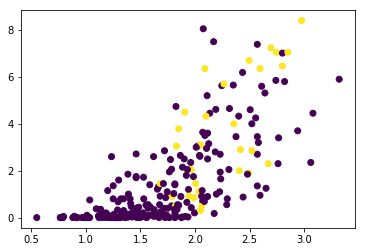

In [243]:
plt.scatter(X_const['DWSmean'], X_const['advotesmean'], c=y)
plt.xlabel("mean")
plt.ylabel("advotesmean")

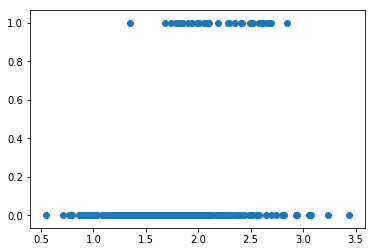

In [114]:
plt.scatter(X_const['DWSmean'], y)

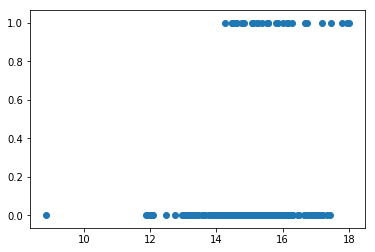

In [115]:
plt.scatter(X_const['PERmean'], y)

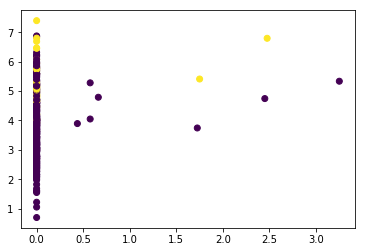

In [142]:
plt.scatter(team_mtarg['advotesmean'], team_mtarg['WSmean'], c=team_mtarg['ConfFinals'])